In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [2]:
# 1. Load data
df = pd.read_csv("train_autoclaim.csv")
df.head(10)

,STATE,CLASS,GENDER,AGE,PAID
0,STATE 14,C6,M,97,1134.44
1,STATE 15,C6,M,96,3761.24
2,STATE 15,C11,M,95,7842.31
3,STATE 15,F6,F,95,2384.67
4,STATE 15,F6,M,95,650.00
5,STATE 15,F6,M,95,391.12
6,STATE 15,C11,M,94,3775.83
7,STATE 10,C6,M,94,415.35
8,STATE 14,C11,M,93,2283.56
9,STATE 03,C11,M,93,665.48


In [3]:
print('Features:', list(df.columns))
print('Size of the data', df.shape)

Features: ['STATE', 'CLASS', 'GENDER', 'AGE', 'PAID']
Size of the data (6773, 5)


In [4]:
# Define the categorical columns to transform
encoder = OrdinalEncoder()
categorical_cols = ['STATE', 'CLASS', 'GENDER']

# Fit and transform the categorical columns
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [5]:
# inspect the mappings 
for col, categories in zip(categorical_cols, encoder.categories_):
    print(f"{col}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} -> {i}")

STATE:
  STATE 01 -> 0
  STATE 02 -> 1
  STATE 03 -> 2
  STATE 04 -> 3
  STATE 06 -> 4
  STATE 07 -> 5
  STATE 10 -> 6
  STATE 11 -> 7
  STATE 12 -> 8
  STATE 13 -> 9
  STATE 14 -> 10
  STATE 15 -> 11
  STATE 17 -> 12
CLASS:
  C1  -> 0
  C11 -> 1
  C1A -> 2
  C1B -> 3
  C1C -> 4
  C2  -> 5
  C6  -> 6
  C7  -> 7
  C71 -> 8
  C72 -> 9
  C7A -> 10
  C7B -> 11
  C7C -> 12
  F1  -> 13
  F11 -> 14
  F6  -> 15
  F7  -> 16
  F71 -> 17
GENDER:
  F -> 0
  M -> 1


array([[<Axes: title={'center': 'STATE'}>,
        <Axes: title={'center': 'CLASS'}>],
       [<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'PAID'}>, <Axes: >]], dtype=object)

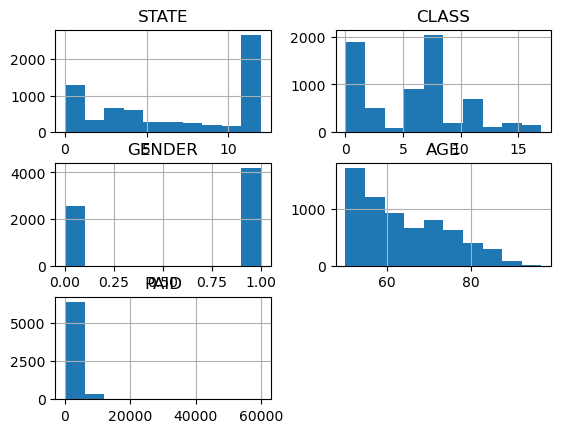

In [6]:
df.hist()

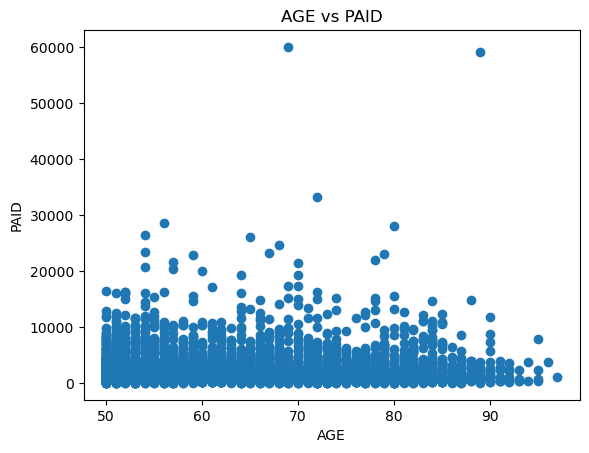

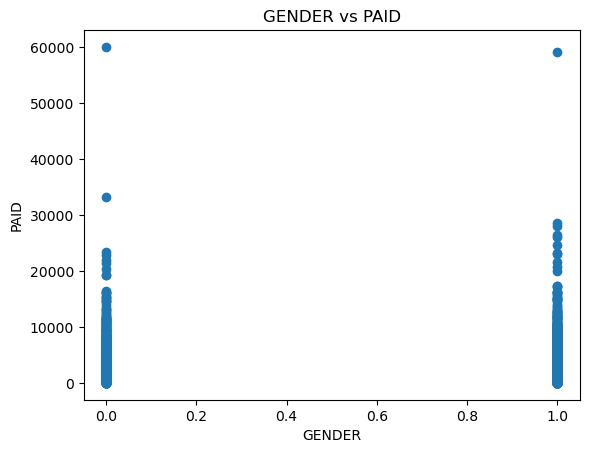

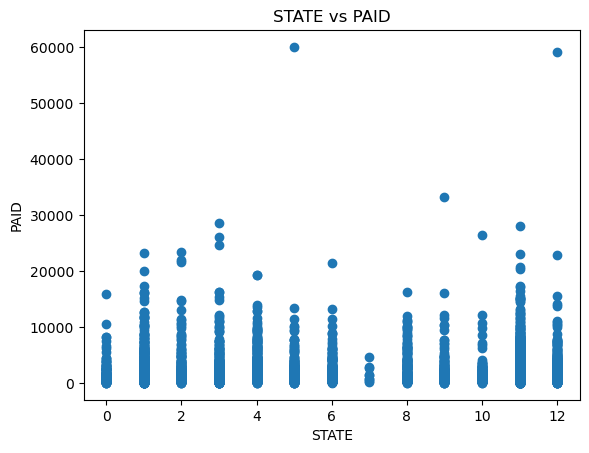

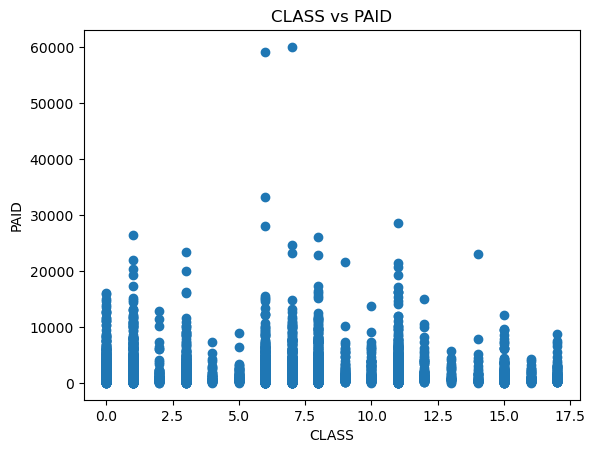

In [7]:
# Scatter plot: AGE vs PAID

plt.figure()
plt.scatter(df['AGE'], df['PAID'])
plt.title('AGE vs PAID')
plt.xlabel('AGE')
plt.ylabel('PAID')
plt.show()

# Scatter plot: GENDER vs PAID
plt.figure()
plt.scatter(df['GENDER'], df['PAID'],)
plt.title('GENDER vs PAID')
plt.xlabel('GENDER')
plt.ylabel('PAID')
plt.show()

# Scatter plot: STATE vs PAID
plt.figure()
plt.scatter(df['STATE'], df['PAID'])
plt.title('STATE vs PAID')
plt.xlabel('STATE')
plt.ylabel('PAID')
plt.show()

# Scatter plot: CLASS vs PAID
plt.figure()
plt.scatter(df['CLASS'], df['PAID'])
plt.title('CLASS vs PAID')
plt.xlabel('CLASS')
plt.ylabel('PAID')
plt.show()

In [8]:
# Save the encoded data
df.to_csv('autoready.csv', index =False)